In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phiusiil-phishing-url-dataset/PhiUSIIL_Phishing_URL_Dataset.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/phiusiil-phishing-url-dataset/PhiUSIIL_Phishing_URL_Dataset.csv")
df.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


In [4]:
df.dtypes

URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineL

In [5]:
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()
corr_matrix.style.background_gradient(cmap='RdYlGn')

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.243091,0.277272,-0.421104,-0.241104,-0.016656,-0.245215,0.033339,0.071058,0.161980,0.459094,0.127472,0.956047,0.312632,0.835809,0.304379,0.685091,0.474901,0.500387,0.782582,0.199112,0.013117,-0.060636,0.045219,-0.075456,-0.215877,-0.193234,-0.094548,-0.073770,-0.082549,0.029975,-0.005168,-0.149104,-0.010952,-0.044875,-0.035443,-0.180909,-0.067420,-0.072551,0.021561,-0.031734,-0.057816,-0.025163,-0.126420,-0.064639,-0.014507,-0.078643,-0.074722,-0.023206,-0.059055,-0.233445
DomainLength,0.243091,1.000000,-0.041398,-0.420694,-0.577425,0.027209,-0.178104,0.152669,0.399157,0.041643,0.011304,0.021627,0.277602,0.547854,0.131709,0.289628,0.020033,0.064477,0.016320,0.272930,0.182803,-0.019218,-0.075171,0.067131,-0.107133,-0.296493,-0.328603,-0.148317,-0.082594,-0.119737,0.019387,-0.046803,-0.202821,-0.012502,-0.051687,-0.038560,-0.216055,-0.111077,-0.111882,0.009409,-0.039944,-0.065895,-0.034773,-0.196860,-0.083458,-0.017596,-0.102216,-0.096712,-0.031673,-0.070099,-0.283152
IsDomainIP,0.277272,-0.041398,1.000000,-0.121439,-0.101307,-0.053220,-0.111769,-0.011125,0.084619,0.001239,0.000354,0.000977,0.244300,-0.002630,0.224703,0.161257,0.288351,0.389523,0.178814,0.285846,0.115484,-0.011741,-0.016211,0.002159,-0.004602,-0.052033,-0.054458,-0.030890,-0.028261,-0.006481,0.023497,-0.010231,-0.021518,-0.002795,-0.009741,-0.007988,-0.046432,-0.011489,-0.011962,-0.008419,-0.015708,-0.013863,-0.005919,-0.022796,-0.016502,-0.004149,-0.023126,-0.018981,-0.006793,-0.015269,-0.060202
URLSimilarityIndex,-0.421104,-0.420694,-0.121439,1.000000,0.572938,0.162042,0.571622,-0.053915,-0.058481,-0.100159,-0.032257,-0.078989,-0.449120,-0.491761,-0.299591,-0.561238,-0.161075,-0.341722,-0.075346,-0.540554,-0.604885,0.346389,0.231147,-0.078496,0.352123,0.604045,0.543969,0.402334,0.313293,0.433413,-0.060840,-0.049634,0.590195,0.041042,0.191208,0.139202,0.673690,0.448227,0.404655,0.061553,0.151290,0.291542,0.087228,0.613620,0.235728,0.057683,0.315679,0.271590,0.091556,0.221960,0.860358
CharContinuationRate,-0.241104,-0.577425,-0.101307,0.572938,1.000000,0.237221,0.349810,0.051438,-0.482314,-0.036231,-0.004371,-0.021257,-0.252761,-0.304448,-0.158497,-0.343880,-0.068517,-0.145347,-0.034872,-0.425542,-0.711020,0.089170,0.133351,-0.068861,0.164529,0.550943,0.568560,0.213020,0.177268,0.206705,-0.031916,0.019089,0.340722,0.021262,0.127151,0.086036,0.380694,0.245257,0.220213,0.075026,0.095809,0.179145,0.059667,0.345566,0.135931,0.027943,0.183900,0.147881,0.049963,0.121745,0.467735
TLDLegitimateProb,-0.016656,0.027209,-0.053220,0.162042,0.237221,1.000000,0.274224,0.386794,-0.250048,-0.016577,0.001207,-0.010993,-0.004864,0.128466,-0.029101,-0.090831,-0.009376,-0.036019,-0.011255,-0.094307,-0.280275,0.043764,0.041658,-0.025272,0.005597,0.298565,0.296253,0.033452,0.058150,0.081560,-0.008145,-0.036884,0.119061,0.005316,0.093219,0.027294,0.097843,0.063004,0.075440,0.070310,0.085441,0.111494,0.038673,0.114394,0.053432,0.008296,0.058475,0.028216,0.015252,0.033182,0.097389
URLCharProb,-0.245215,-0.178104,-0.111769,0.571622,0.349810,0.274224,1.000000,0.069818,-0.081576,-0.056108,-0.029030,-0.044623,-0.214701,0.045577,-0.290734,-0.708875,-0.103363,-0.193290,-0.055230,-0.307038,-0.396982,0.161159,0.124884,-0.058660,0.156942,0.361329,0.331182,0.216097,0.1

In [6]:
correlation_with_target = corr_matrix["label"].drop("label") #extracts the column of correlations between all features and the target variable (label)
print("Correlation with target:\n", correlation_with_target)

Correlation with target:
 URLLength                    -0.233445
DomainLength                 -0.283152
IsDomainIP                   -0.060202
URLSimilarityIndex            0.860358
CharContinuationRate          0.467735
TLDLegitimateProb             0.097389
URLCharProb                   0.469749
TLDLength                    -0.079159
NoOfSubDomain                -0.005955
HasObfuscation               -0.052473
NoOfObfuscatedChar           -0.015315
ObfuscationRatio             -0.041915
NoOfLettersInURL             -0.258090
LetterRatioInURL             -0.367794
NoOfDegitsInURL              -0.177980
DegitRatioInURL              -0.432032
NoOfEqualsInURL              -0.076963
NoOfQMarkInURL               -0.175621
NoOfAmpersandInURL           -0.034622
NoOfOtherSpecialCharsInURL   -0.358891
SpacialCharRatioInURL        -0.533537
IsHTTPS                       0.609132
LineOfCode                    0.272257
LargestLineLength            -0.041111
HasTitle                      0.459725

In [7]:
# Identify features with low correlation to the target (e.g., abs(correlation) < 0.5)
low_correlation_features = correlation_with_target[correlation_with_target.abs() < 0.5].index.tolist()

#abs() method in Python is used to calculate the absolute value of numbers. In the context of a Pandas Series or DataFrame, it 
#computes the absolute value of each element, ensuring all values are non-negative.

print("Low correlation features:", low_correlation_features)

Low correlation features: ['URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']


In [8]:
df.drop(['URL', 'Domain', 'Title', 'URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'], axis = 1, inplace = True)
df

,TLD,URLSimilarityIndex,SpacialCharRatioInURL,IsHTTPS,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo,label
0,com,100.000000,0.032,1,0.000000,0.000000,1,0,0,1,1,1,1
1,de,100.000000,0.087,1,55.555556,55.555556,0,0,1,1,0,1,1
2,uk,100.000000,0.069,1,46.666667,46.666667,1,1,0,1,1,1,1
3,com,100.000000,0.038,1,0.000000,0.000000,1,0,1,1,1,1,1
4,org,100.000000,0.030,1,100.000000,100.000000,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,com,100.000000,0.034,1,100.000000,100.000000,1,1,1,1,1,1,1
235791,uk,100.000000,0.071,1,0.000000,0.000000,1,1,1,1,1,0,1
235792,be,100.000000,0.033,1,100.000000,100.000000,1,1,1,1,0,1,1
235793,dev,28.157537,0.091,1,0.000000,0.000000,1,0,0,1,1,0,0


In [9]:
X = df.drop('label', axis = 1) #feature
X

,TLD,URLSimilarityIndex,SpacialCharRatioInURL,IsHTTPS,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo
0,com,100.000000,0.032,1,0.000000,0.000000,1,0,0,1,1,1
1,de,100.000000,0.087,1,55.555556,55.555556,0,0,1,1,0,1
2,uk,100.000000,0.069,1,46.666667,46.666667,1,1,0,1,1,1
3,com,100.000000,0.038,1,0.000000,0.000000,1,0,1,1,1,1
4,org,100.000000,0.030,1,100.000000,100.000000,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235790,com,100.000000,0.034,1,100.000000,100.000000,1,1,1,1,1,1
235791,uk,100.000000,0.071,1,0.000000,0.000000,1,1,1,1,1,0
235792,be,100.000000,0.033,1,100.000000,100.000000,1,1,1,1,0,1
235793,dev,28.157537,0.091,1,0.000000,0.000000,1,0,0,1,1,0


In [10]:
y = df['label'] #target
y

0         1
1         1
2         1
3         1
4         1
         ..
235790    1
235791    1
235792    1
235793    0
235794    1
Name: label, Length: 235795, dtype: int64

In [11]:
original_tlds = X['TLD'].unique()

In [12]:
#converting TLD column into a numeric format with label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['TLD_numeric'] = label_encoder.fit_transform(X['TLD'])
X

,TLD,URLSimilarityIndex,SpacialCharRatioInURL,IsHTTPS,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo,TLD_numeric
0,com,100.000000,0.032,1,0.000000,0.000000,1,0,0,1,1,1,231
1,de,100.000000,0.087,1,55.555556,55.555556,0,0,1,1,0,1,254
2,uk,100.000000,0.069,1,46.666667,46.666667,1,1,0,1,1,1,647
3,com,100.000000,0.038,1,0.000000,0.000000,1,0,1,1,1,1,231
4,org,100.000000,0.030,1,100.000000,100.000000,1,1,1,1,1,1,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,com,100.000000,0.034,1,100.000000,100.000000,1,1,1,1,1,1,231
235791,uk,100.000000,0.071,1,0.000000,0.000000,1,1,1,1,1,0,647
235792,be,100.000000,0.033,1,100.000000,100.000000,1,1,1,1,0,1,157
235793,dev,28.157537,0.091,1,0.000000,0.000000,1,0,0,1,1,0,258


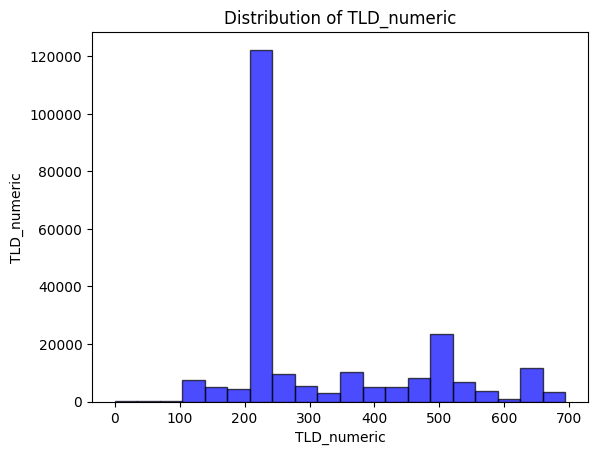

In [13]:
import matplotlib.pyplot as plt

# Visualizing the distribution of 'TLD_numeric'
plt.hist(X['TLD_numeric'], bins=20, color='blue', edgecolor='k', alpha=0.7)
plt.title('Distribution of TLD_numeric')
plt.xlabel('TLD_numeric')
plt.ylabel('TLD_numeric')
plt.show()

#The graph highlights that TLDs within the numeric range 200–250, corresponding to common domains 
#such as cars, casa, cash, etc. dominate the dataset.

In [14]:
label_encoder = LabelEncoder()
label_encoder.fit(original_tlds)

# Decode the numeric range
decoded_tlds = label_encoder.inverse_transform(range(200, 250))
print(decoded_tlds)

['cars' 'casa' 'cash' 'cat' 'cc' 'cc:8443' 'cd' 'center' 'cern' 'cf' 'cfd'
 'ch' 'chat' 'church' 'ci' 'citic' 'city' 'ck' 'cl' 'cleaning' 'click'
 'clothing' 'cloud' 'club' 'cm' 'cn' 'co' 'coach' 'codes' 'coffee'
 'college' 'com' 'com:2096' 'com:4000' 'com:443' 'com:9595' 'community'
 'company' 'computer' 'condos' 'consulting' 'cool' 'coop' 'corsica' 'cr'
 'crs' 'cu' 'cv' 'cx' 'cy']


In [15]:
X.columns
X.drop(['TLD'], axis = 1, inplace = True)
X

,URLSimilarityIndex,SpacialCharRatioInURL,IsHTTPS,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo,TLD_numeric
0,100.000000,0.032,1,0.000000,0.000000,1,0,0,1,1,1,231
1,100.000000,0.087,1,55.555556,55.555556,0,0,1,1,0,1,254
2,100.000000,0.069,1,46.666667,46.666667,1,1,0,1,1,1,647
3,100.000000,0.038,1,0.000000,0.000000,1,0,1,1,1,1,231
4,100.000000,0.030,1,100.000000,100.000000,1,1,1,1,1,1,503
...,...,...,...,...,...,...,...,...,...,...,...,...
235790,100.000000,0.034,1,100.000000,100.000000,1,1,1,1,1,1,231
235791,100.000000,0.071,1,0.000000,0.000000,1,1,1,1,1,0,647
235792,100.000000,0.033,1,100.000000,100.000000,1,1,1,1,0,1,157
235793,28.157537,0.091,1,0.000000,0.000000,1,0,0,1,1,0,258


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
#Train a neural network on the features

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = X_train.shape[1], name = 'dense'))
model.add(Dense(1, activation='sigmoid', name='dense_1'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,793 (7.00 KB)

 Trainable params: 1,793 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=32,  validation_split=0.2) #fit the model

Epoch 1/10
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9434 - loss: 0.3043 - val_accuracy: 0.9923 - val_loss: 0.0215
Epoch 2/10
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9525 - val_loss: 0.1360
Epoch 3/10
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9953 - val_loss: 0.0152
Epoch 4/10
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9944 - loss: 0.0183 - val_accuracy: 0.9975 - val_loss: 0.0081
Epoch 5/10
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9965 - val_loss: 0.0161
Epoch 6/10
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.9990 - val_loss: 0.0039
Epoch 7/10
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9954 - val_loss: 0.0148
Epoch 8/10
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9974 - loss: 0.0084 - 

1474/1474 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step
Accuracy: 0.9993
Recall: 0.9995
F1 Score: 0.9994
Precision: 0.9993


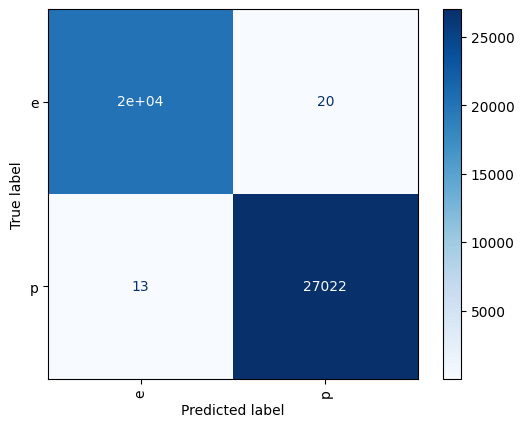

In [19]:
#Evaluate the original model
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay
import seaborn as sns


sns.reset_orig()
y_predicted = model.predict(X_test) > 0.5 #applying a threshold of 0.5 to convert the predicted probabilities into binary class labels
#If the predicted probability is greater than 0.5, the model predicts the sample as class 1 (positive class).
#If the predicted probability is less than or equal to 0.5, the model predicts the sample as class 0 (negative class).

accuracy = accuracy_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted) #combines both precision and recall into a single value, providing a more balanced evaluation of a model's performance
precision = precision_score(y_test, y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

labels = ['e', 'p']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

In [20]:
#Accuracy: This indicates that the model correctly classified 99.93% of the total instances (both legitimate and phishing URLs)
#Recall: A recall of 0.9995 means that the model correctly identified 99.85% of phishing URLs
#F1 Score: F1 score of 0.9994 indicates that the model has a high balance between precision and recall
#Precision: A precision of 0.9993 means that 99.93% of the URLs predicted to be phishing were actually phishing